In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [4]:
# считывание файла
df1 = pd.read_csv("data/ex1.csv")
df1.sample(5)

,x,y
279,65.622385,189.850167
482,39.707106,102.954438
447,45.333668,275.556843
236,53.801994,152.547088
74,44.259399,8.323517


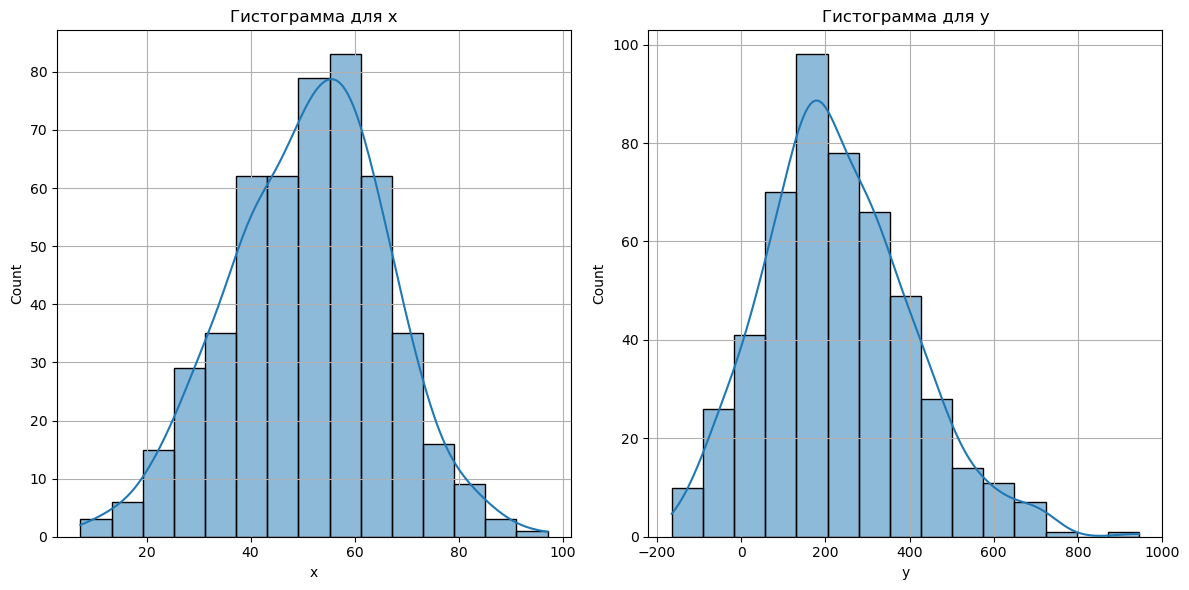

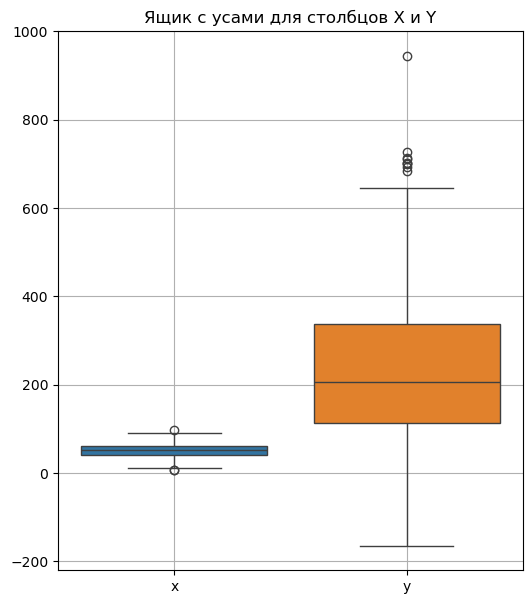

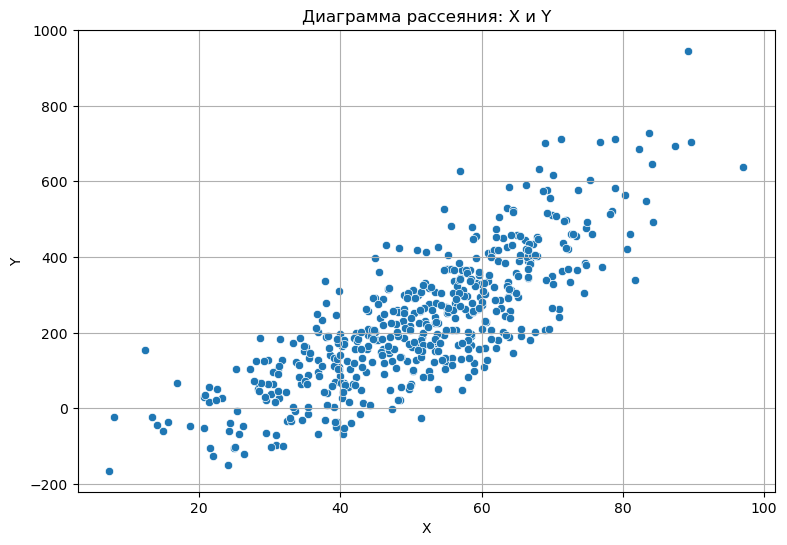

In [29]:
# КРИТЕРИЙ 1

# ! проверка, что все элементы - численного типа

# Преобразуем все данные в числовой формат
numeric_data = df1.apply(pd.to_numeric, errors="coerce")

# Проверим, есть ли нечисловые значения
if numeric_data.isna().sum().sum() > 0:
    raise ValueError("В данных присутствуют нечисловые значения")

#! построение гистограмм распределения
plt.figure(figsize=(12, 6))

for i, col in enumerate(df1.columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df1[col], kde=True, bins=15)
    plt.title(f"Гистограмма для {col}")
    plt.grid()

plt.tight_layout()
plt.show()

#! построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(6, 7))
sns.boxplot(data=df1)
plt.title("Ящик с усами для столбцов X и Y")
plt.grid()
plt.show()


#! построение диаграммы рассеяния
plt.figure(figsize=(9, 6))
sns.scatterplot(x=df1["x"], y=df1["y"])
plt.title("Диаграмма рассеяния: X и Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()


In [17]:
df1.corr()

,x,y
x,1.000000,0.803232
y,0.803232,1.000000


In [45]:
# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков

- данное распределение похоже на нормальное исходя из гистограмм
- диаграммы рассеяния показывают линейную зависимость между переменными
- выбросы хоть и есть, но не сильно влияют на результат корреляции

Делаем вывод, что использовать коэффициент корреляции Пирсона целесообразно

In [18]:
from scipy.stats import pearsonr

In [23]:
# КРИТЕРИЙ 2

#! расчет коэффициента Пирсона
r, p_value = pearsonr(df1['x'], df1['y'])

#! расчет t-критерия
t_stat = r * np.sqrt((len(df1) - 2) / (1 - r**2))

#! вывод о степени корреляции величин и статистической значимости их взаимосвязи 

print(f"t-Коэффициент корреляции Пирсона: {r}")
print(f"t-статистика: {t_stat}")
print(f"t-p_value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: корреляция статистически значима")
else:
    print("Принимаем нулевую гипотезу: корреляция не статистически значима")

if abs(r) < 0.3:
    correlation_strength = "Слабая"
elif abs(r) < 0.7:
    correlation_strength = "Умеренная"
else:
    correlation_strength = "Сильная"

print(f"Степень корреляции: {correlation_strength} ({r})")

t-Коэффициент корреляции Пирсона: 0.8032321850936792
t-статистика: 30.092129139493757
t-p_value: 3.9738590563692405e-114
Отвергаем нулевую гипотезу: корреляция статистически значима
Степень корреляции: Сильная (0.8032321850936792)


In [46]:
# вывод о степени корреляции величин и статистической значимости их взаимосвязи 

На основе коэффициента корреляции Пирсона, t-статистики и p-значения можно утверждать, что между переменными 𝑋 и 𝑌 существует статистически значимая сильная линейная связь

Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [26]:
# считывание файла
df2 = pd.read_csv("data/ex2.csv")
df2.sample(5)

,x,y
349,0.034484,36.327168
174,0.032485,26.942697
238,1.020287,44.440635
43,0.000273,18.726944
127,0.526727,27.080741


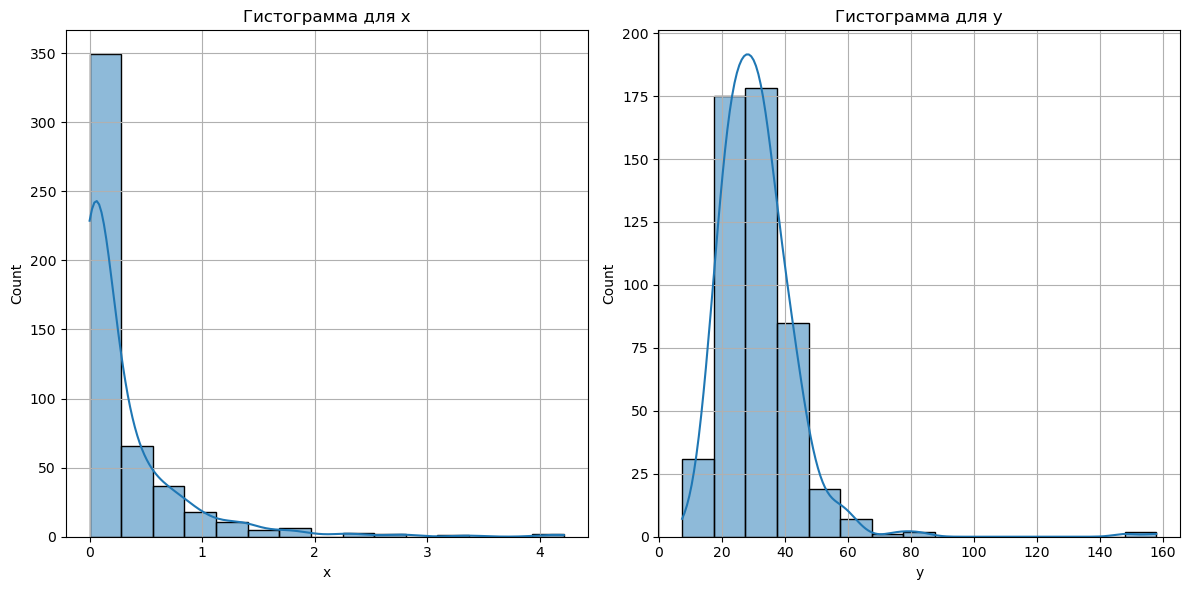

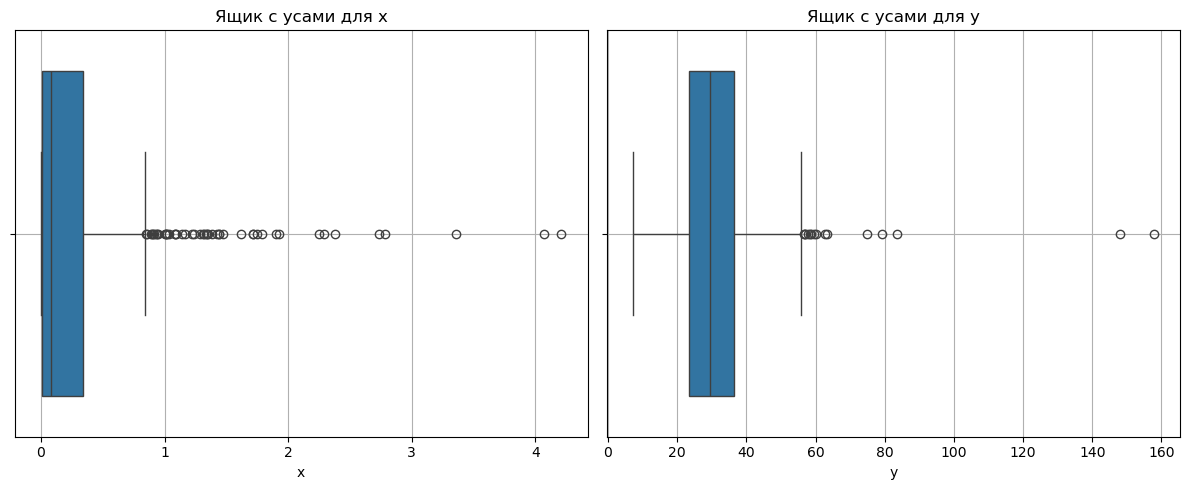

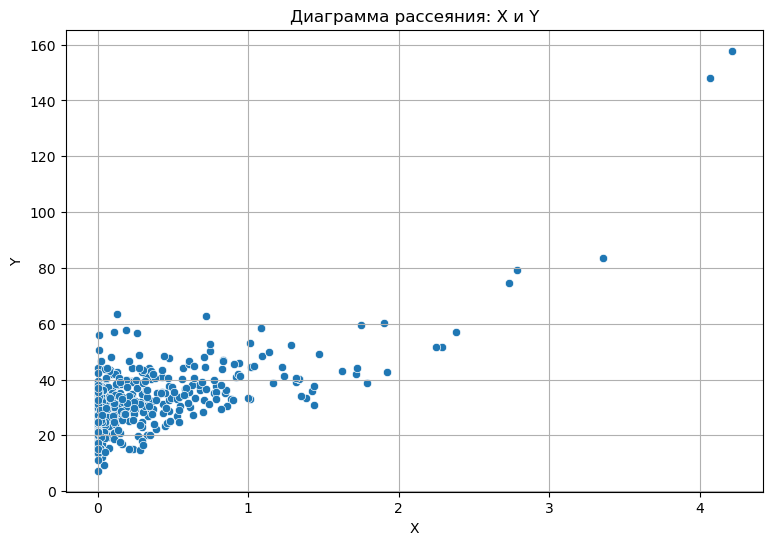

In [63]:
# КРИТЕРИЙ 3

# !проверка, что все элементы - численного типа
numeric_data = df2.apply(pd.to_numeric, errors="coerce")

# Проверим, есть ли нечисловые значения
if numeric_data.isna().sum().sum() > 0:
    raise ValueError("В данных присутствуют нечисловые значения")

#! построение гистограмм распределения
plt.figure(figsize=(12, 6))

for i, col in enumerate(df2.columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df2[col], kde=True, bins=15)
    plt.title(f"Гистограмма для {col}")
    plt.grid()

plt.tight_layout()
plt.show()

# !построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df2["x"])
plt.grid()
plt.title("Ящик с усами для x")

plt.subplot(1, 2, 2)
sns.boxplot(x=df2["y"])
plt.grid()
plt.title("Ящик с усами для y")

plt.tight_layout()
plt.show()

#! построение диаграммы рассеяния
plt.figure(figsize=(9, 6))
sns.scatterplot(x=df2["x"], y=df2["y"])
plt.title("Диаграмма рассеяния: X и Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [ ]:
# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков

Обе переменные не нормально распределены, присутствует значительное число выбросов, взаимосвязь нелинейна. В таких условиях подходит коэффициент Спирмена

In [51]:
from scipy.stats import spearmanr
from scipy.stats import t

In [59]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена
spearman_r, spearman_p_value = spearmanr(df2["x"], df2["y"])

# расчет t-критерия
t_spearman = spearman_r * np.sqrt((len(df2) - 2) / (1 - spearman_r**2))
spearman_r, spearman_p_value, t_spearman

alpha = 0.05


print(f"Коэффициент корреляции Спирмена: {spearman_r}")
print(f"p-значение: {spearman_p_value}")
print(f"t-статистика: {t_spearman}")

if spearman_p_value < alpha:
    print("\nОтвергаем нулевую гипотезу: корреляция статистически значима")
else:
    print("\nПринимаем нулевую гипотезу: корреляция не статистически значима")

if abs(spearman_r) < 0.3:
    correlation_strength = "Слабая"
elif abs(spearman_r) < 0.7:
    correlation_strength = "Умеренная"
else:
    correlation_strength = "Сильная"

print(f"Степень корреляции: {correlation_strength} ({spearman_r})")

Коэффициент корреляции Спирмена: 0.6170866283465134
p-значение: 8.471901488365329e-54
t-статистика: 17.50023569782885

Отвергаем нулевую гипотезу: корреляция статистически значима
Степень корреляции: Умеренная (0.6170866283465134)


In [ ]:
# вывод о степени корреляции величин и статистической значимости их взаимосвязи

Между переменными 𝑋 и 𝑌 существует статистически значимая умеренная монотонная взаимосвязь.

Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [87]:
# считывание файла
df3 = pd.read_csv("data/ex3.csv")
df3.sample(5)

,x,y
2,7.976611,-16.409053
14,4.347166,-2.673576
17,-1.151876,8.440863
13,9.389102,-13.095903
7,0.715490,5.136392


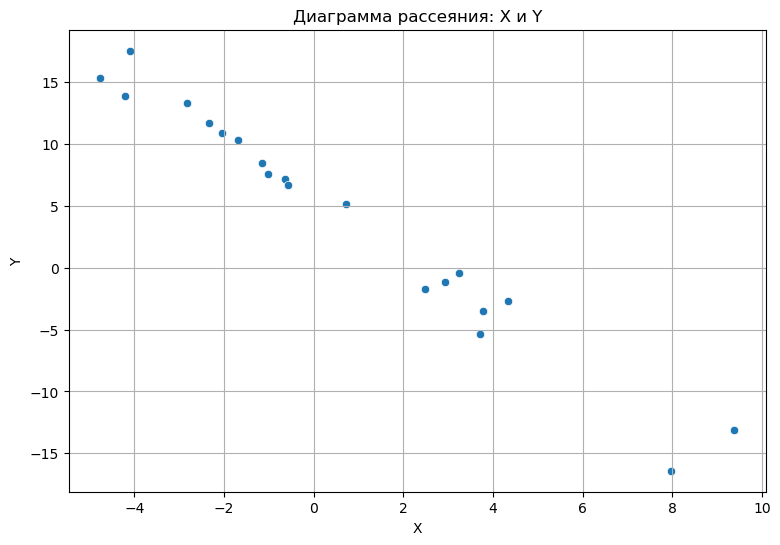

Коэффициент корреляции Пирсона: -0.9851417834585036
p-значение: 3.176453356769722e-15
Отвергаем нулевую гипотезу: корреляция статистически значима
Степень корреляции: Сильная (-0.9851417834585036)
Корреляция Пирсона подходит для анализа линейной зависимости между переменными


In [88]:
# КРИТЕРИЙ 5


# Преобразуем все данные в числовой формат
numeric_data = df3.apply(pd.to_numeric, errors="coerce")

# Проверим, есть ли нечисловые значения
if numeric_data.isna().sum().sum() > 0:
    raise ValueError("В данных присутствуют нечисловые значения")


#! построение диаграммы рассеяния


plt.figure(figsize=(9, 6))
sns.scatterplot(x=df3["x"], y=df3["y"])
plt.title("Диаграмма рассеяния: X и Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()


#! расчет коэффициента Пирсона

pearson_coefficient, p_value = pearsonr(df3["x"], df3["y"])
print(f"Коэффициент корреляции Пирсона: {pearson_coefficient}")
print(f"p-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: корреляция статистически значима")
else:
    print("Принимаем нулевую гипотезу: корреляция не статистически значима")

if abs(pearson_coefficient) < 0.3:
    correlation_strength = "Слабая"
elif abs(pearson_coefficient) < 0.7:
    correlation_strength = "Умеренная"
else:
    correlation_strength = "Сильная"

print(f"Степень корреляции: {correlation_strength} ({pearson_coefficient})")
print("Корреляция Пирсона подходит для анализа линейной зависимости между переменными")

In [ ]:
# вывод о целесообразности использования корреляции Пирсона

На диаграмме рассеяния видна линейная обратная зависимость и отсутствие критических выбросов. В данной задаче вполне подойдет коэффициент Пирсона

In [78]:
import statsmodels.api as sm

0     2.479574
1    -0.630393
2     7.976611
3    -4.219019
4    -1.681153
5    -2.045430
6    -1.024935
7     0.715490
8     2.933446
9    -4.759558
10   -2.824723
11    3.713805
12   -4.099113
13    9.389102
14    4.347166
15   -2.338837
16   -0.579976
17   -1.151876
18    3.769571
19    3.238840
Name: x, dtype: float64

Коэффициенты регрессии:  -2.3391357411141347 5.740762449346205


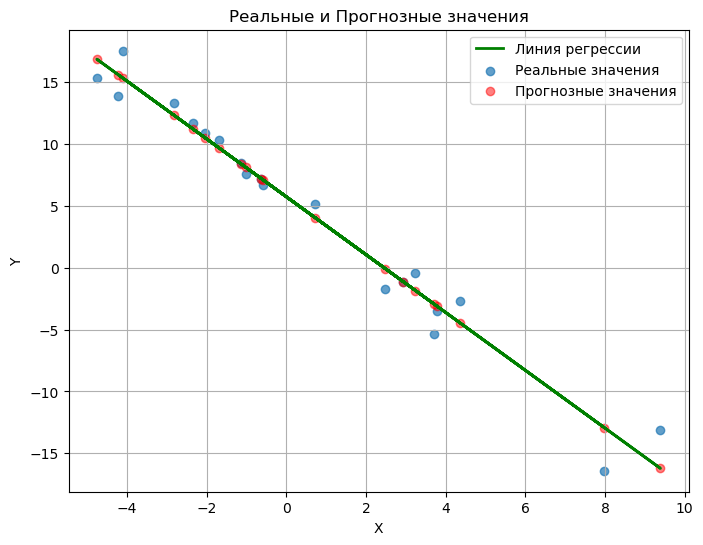

In [104]:
# КРИТЕРИЙ 6

#! расчет коэффициентов линейной регрессии
X = sm.add_constant(df3["x"])
model = sm.OLS(df3["y"], X).fit()

# Получение коэффициентов регрессии
b0, b1 = model.params
print("Коэффициенты регрессии: ", b1, b0)

# построение диаграммы рассеяния прогнозных и реальных значений на одном графике

plt.figure(figsize=(8, 6))
plt.plot(df3["x"], model.predict(X), label="Линия регрессии", color="green", linewidth=2)
plt.scatter(df3["x"], df3["y"], label="Реальные значения", alpha=0.7)
plt.scatter(X['x'], model.predict(X), label="Прогнозные значения", color="red", alpha=0.5)
plt.title("Реальные и Прогнозные значения")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

In [105]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации
mape = np.mean(abs((df3["y"] - model.predict(X)) / df3["y"])) * 100
print(f"Средняя ошибка аппроксимации (MAPE):", mape)

Средняя ошибка аппроксимации (MAPE): 35.2638048777269


In [75]:
from scipy.stats import f

In [108]:
# КРИТЕРИЙ 8

# расчет F-критерия
f_statistic = model.fvalue
f_p_value = model.f_pvalue

# вывод о статистической значимости уравнения в целом

print(f"F-статистика: {f_statistic}")
print(f"p-значение для F-критерия: {f_p_value}")

if f_p_value < 0.05:
    print("\nУравнение регрессии статистически значимо")
else:
    print("\nУравнение регрессии не статистически значимо")

F-статистика: 592.2591378853077
p-значение для F-критерия: 3.1764533567698717e-15

Уравнение регрессии статистически значимо


In [117]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
print("Стандартные ошибки\n", model.bse)

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции
print("\nКоэффициент корреляции\n", pearsonr(df3["x"], df3["y"])[0])

t_coef = abs(t.ppf(alpha / 2, len(df3["x"]) - 2))
t_real = abs(t.ppf(model.pvalues / 2, len(df3["x"]) - 2))[1]

print(f"\nРасчетное значение t-критерия: {t_real}")
print(f"Критическое значение t-критерия: {t_coef}")

# запись диапазона коэффицентов регрессии

print(
    f"\n95% доверительный интервал для const': {model.params.iloc[0]} +/- {t_coef*model.bse.iloc[0]}"
)
print(
    f"95% доверительный интервал для x': {model.params.iloc[1]} +/- {t_coef*model.bse.iloc[1]}"
)

Стандартные ошибки
 const    0.375510
x        0.096117
dtype: float64

Коэффициент корреляции
 -0.9851417834585036

Расчетное значение t-критерия: 24.33637478930065
Критическое значение t-критерия: 2.10092204024096

95% доверительный интервал для 'const': 5.740762449346205 +/- 0.788918013711434
95% доверительный интервал для 'x': -2.3391357411141347 +/- 0.2019340134333657


In [ ]:
# вывод о статистической значимости коэффициентов регрессии

По результатам исследования  можно сделать вывод, что между признаком x и критерием y существует отрицательная линейная связь

In [118]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6

x0 = 6
predicted_value = model.predict(np.array([1, x0]))
predicted_interval = model.get_prediction(np.array([1, x0])).summary_frame(alpha=0.05)
print(f"Предсказанное значение y при x0 = {x0}: {predicted_value[0]}")
print(
    f"95% доверительный интервал: {predicted_interval.loc[0, 'obs_ci_lower'], predicted_interval.loc[0, 'obs_ci_upper']}"
)

Предсказанное значение y при x0 = 6: -8.294051997338604
95% доверительный интервал: (-12.016863712109961, -4.571240282567247)


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [119]:
# считывание файла
df4 = pd.read_csv("data/ex4.csv")
df4.sample(5)

,x1,x2,y
14,1.761671,21.432175,81.858101
1,-6.443507,23.970769,137.003862
16,4.487054,28.436259,92.604479
19,-1.318919,17.914042,82.893497
0,13.637973,12.069977,-9.893143


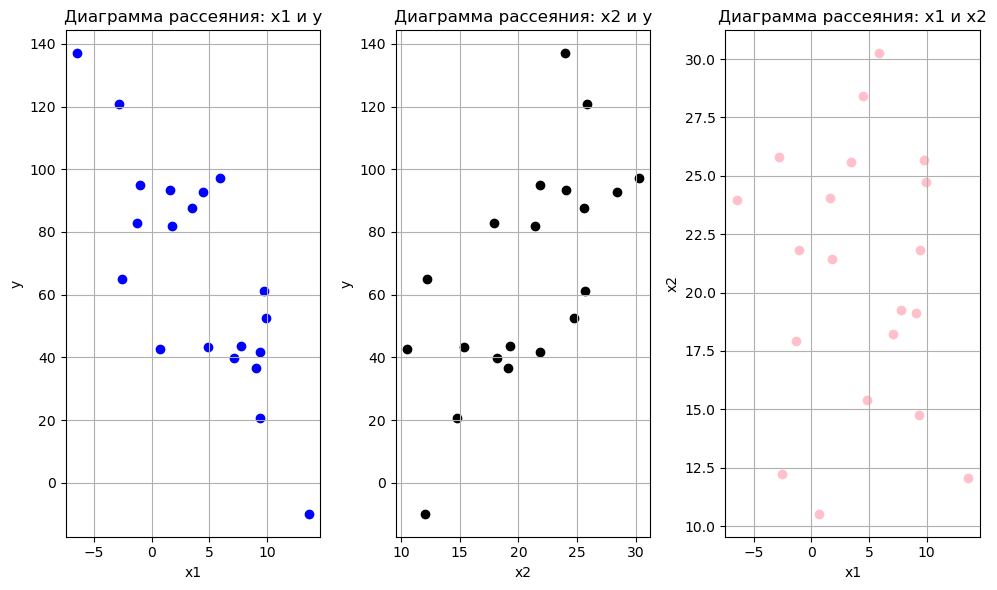

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1993.
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           6.90e-21
Time:                        23:45:09   Log-Likelihood:                -44.683
No. Observations:                  20   AIC:                             95.37
Df Residuals:                      17   BIC:                             98.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7221      2.223      3.024      0.0

In [125]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.scatter(df4["x1"], df4["y"], color="blue")
plt.title("Диаграмма рассеяния: x1 и y")
plt.grid()
plt.xlabel("x1")
plt.ylabel("y")

plt.subplot(1, 3, 2)
plt.scatter(df4["x2"], df4["y"], color="black")
plt.title("Диаграмма рассеяния: x2 и y")
plt.grid()
plt.xlabel("x2")
plt.ylabel("y")

plt.subplot(1, 3, 3)
plt.scatter(df4["x1"], df4["x2"], color="pink")
plt.title("Диаграмма рассеяния: x1 и x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()

plt.tight_layout()
plt.show()

# вывод о корректности использования модели множественной регрессии
# расчет коэффициентов корреляции

X = df4[["x1", "x2"]]
X = sm.add_constant(X)
y = df4["y"]

model = sm.OLS(y, X).fit()

model_summary = model.summary()
print(model_summary)

# вывод о необходимости устранения какого-либо фактора

In [126]:
df4.corr()

,x1,x2,y
x1,1.000000,-0.075013,-0.787807
x2,-0.075013,1.000000,0.669834
y,-0.787807,0.669834,1.000000


Модель множественной регрессии применима корректно, так как отсутствует мультиколлинеарность между переменными. Значение 𝑅=0.996 свидетельствует о том, что модель объясняет 99.6% вариации зависимой переменной y, что указывает на её высокую точность. Оба независимых фактора (x1 и x2) статистически значимы и оказывают существенное влияние на модель. Корреляция между x1 и x2 невысока, что подтверждает отсутствие мультиколлинеарности. Следовательно, нет необходимости исключать какие-либо из факторов

In [128]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии
X = df4[["x1", "x2"]]
y = df4["y"]

X_std = (X - X.mean()) / X.std()
y_std = (y - y.mean()) / y.std()

model_standardized = sm.OLS(y_std, X_std).fit()
standardized_coefficients = model_standardized.params
print(
    f"Коэффициенты  регрессии - x1 : {model_standardized.params.iloc[0]}, x2 : {model_standardized.params.iloc[1]}"
)

Коэффициенты  регрессии - x1 : -0.7417345957390163, x2 : 0.6141944304545278


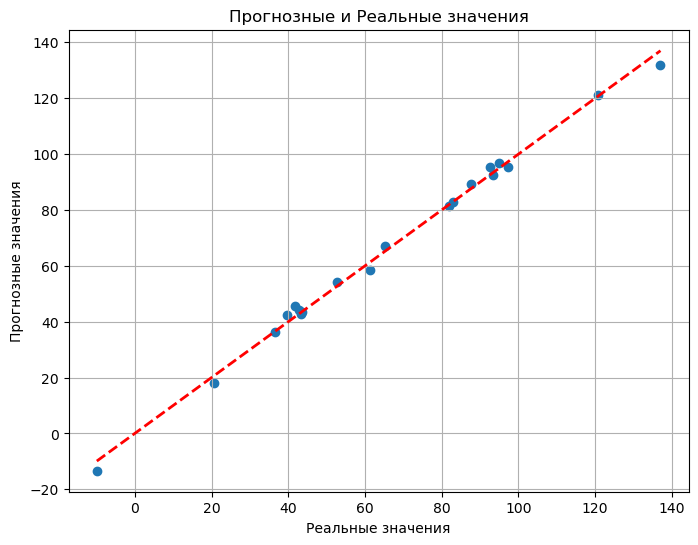

Коэффициенты чистой регрессии - 'const' : 6.7220763595468185, 'x1' : -4.917384791357818, 'x2' : 3.892684581539494


In [132]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии

# построение диаграмм рассеяния прогнозных и реальных значений на одном графике

X = df4[["x1", "x2"]]
y = df4["y"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)
plt.title("Прогнозные и Реальные значения")
plt.xlabel("Реальные значения")
plt.ylabel("Прогнозные значения")
plt.grid()
plt.show()

print(
    f"Коэффициенты чистой регрессии - '{model.params.index[0]}' : {model.params.iloc[0]}, '{model.params.index[1]}' : {model.params.iloc[1]}, '{model.params.index[2]}' : {model.params.iloc[2]}"
)

In [135]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции
r_sqr = model.rsquared
corr_ind = r_sqr**0.5

print("Коэффициент детерминации:", r_sqr)
print("Индекс множественной корреляции:", corr_ind)

# расчет F-критерия
f_statistic = model.fvalue
print(f"F-критерий: {f_statistic}")



Коэффициент детерминации: 0.9957525438616119
Индекс множественной корреляции: 0.9978740120183569
F-критерий: 1992.697828313722


In [ ]:
# вывод о статистической значимости уравнения в целом

Высокие значения F-критерия и коэффициента детерминации подтверждают статистическую значимость уравнения регрессии, что свидетельствует о его способности эффективно объяснять вариацию зависимой переменной

In [783]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике

In [136]:
from mpl_toolkits.mplot3d import Axes3D

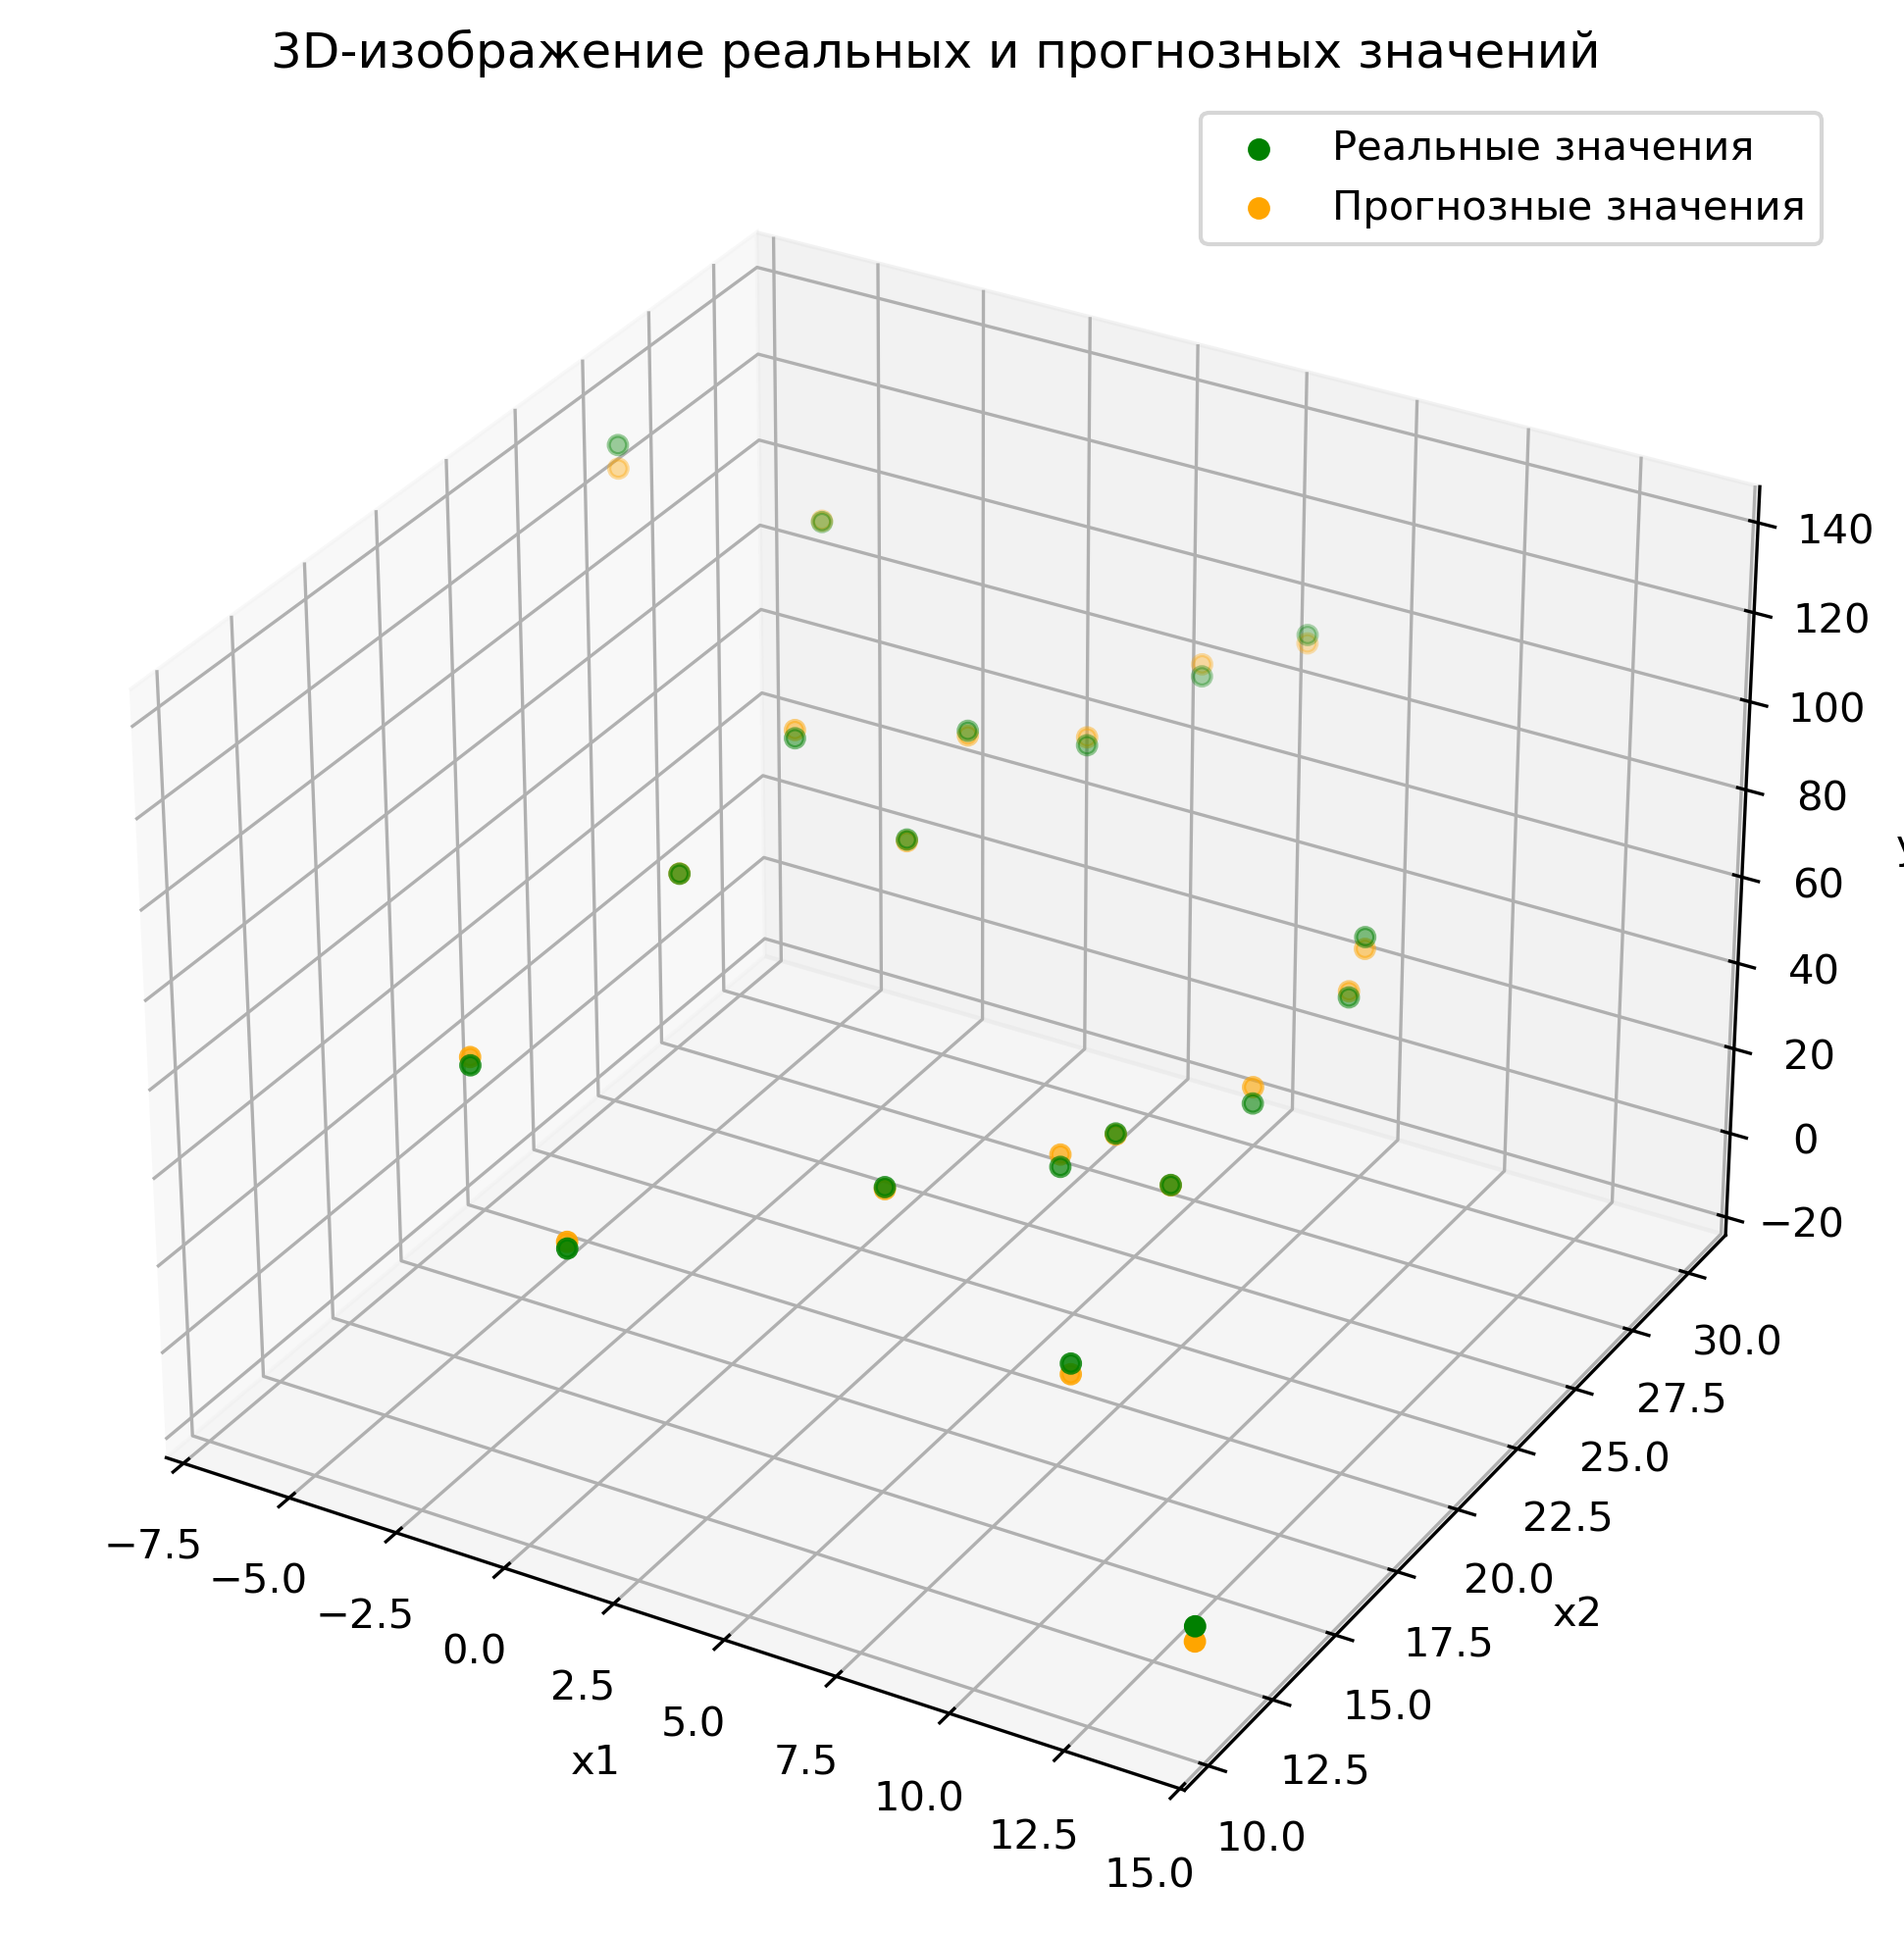

In [140]:
fig = plt.figure(figsize=(10, 8), dpi=300)
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df4["x1"], df4["x2"], df4["y"], color="green", label="Реальные значения")

ax.scatter(df4["x1"], df4["x2"], y_pred, color="orange", label="Прогнозные значения")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.legend()
plt.title("3D-изображение реальных и прогнозных значений")
plt.show()